# Population Density Map

Explanation:

Below are visualizations of three population density datasets for the Netherlands, each with a different spatial resolution:

* 100m x 100m grid

* 500m x 500m grid

* 1 km² grid

For the 100m and 500m datasets, data is available for multiple years. To make a comparison, maps from 2015 and 2020 are shown for each resolution. For each year, two maps are displayed:

* The first map (uniform color) highlights all polygons included in the dataset.

* The second map (colored by value) shows only the polygons for which valid population data is available.

For the 1 km² dataset, only data from 2012 is available, so a single year is shown.

In [31]:
import matplotlib.pyplot as plt
import geopandas as gpd
import mapclassify
import folium
import fiona
import os

In [7]:
current_dir = os.getcwd()
print(current_dir)

/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/notebooks


In [48]:
def layer_viewer(year, resolution, column_to_display):
    current_dir = os.getcwd()
    path = os.path.join(current_dir, f'../data/raw/population_density/{resolution}m/cbs_vk{resolution}_{year}_vol.gpkg')

    layers = fiona.listlayers(path)
    print("Layers:")
    for layer in layers:
        print(layer)

    gdf = gpd.read_file(path, layer=layers[0])
    print(gdf.head())

    gdf.plot()
    plt.title("Layer Map")
    plt.show()

    # Replace invalid population values (-99997) with NaN
    gdf[column_to_display] = gdf[column_to_display].replace(-99997, None)

    # Plot using a color scale
    ax = gdf.plot(
        column=column_to_display,
        cmap="viridis",
        scheme="quantiles",  # try also: "equal_interval", "natural_breaks"
        k=7,  # number of bins
        legend=True,
        figsize=(10, 10)
    )

    leg = ax.get_legend()
    leg.set_bbox_to_anchor((1.15, 0.5))  # (x, y) position in figure coordinates
    leg.set_title("Inwoners")
    plt.title(f"Population Density by 500m Grid, Year: {year}")
    plt.axis("off")
    plt.show()

### Map 100m x 100m, year 2015

Layers:
vierkant_100m_2015


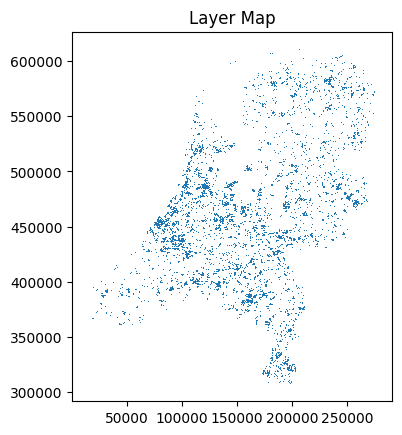

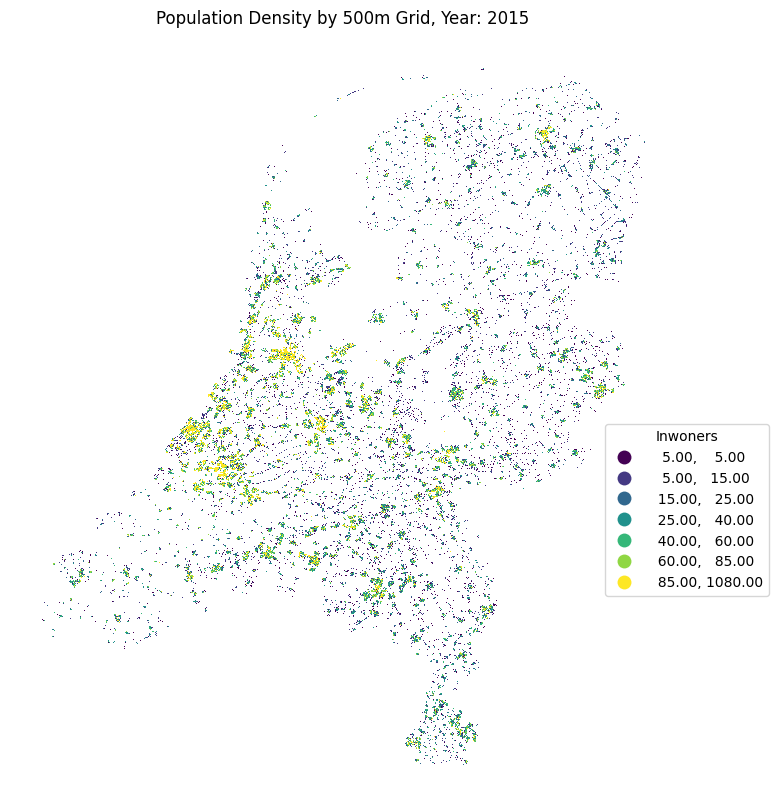

In [37]:
year = 2015
resolution = 100
column_to_display = "aantal_inwoners"

layer_viewer(year, resolution, column_to_display)

### Map 100m x 100m, year 2020

Layers:
vierkant_100m_2020


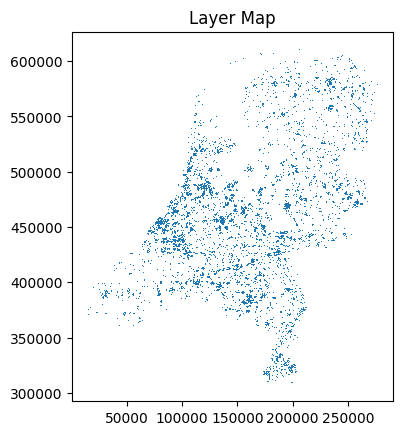

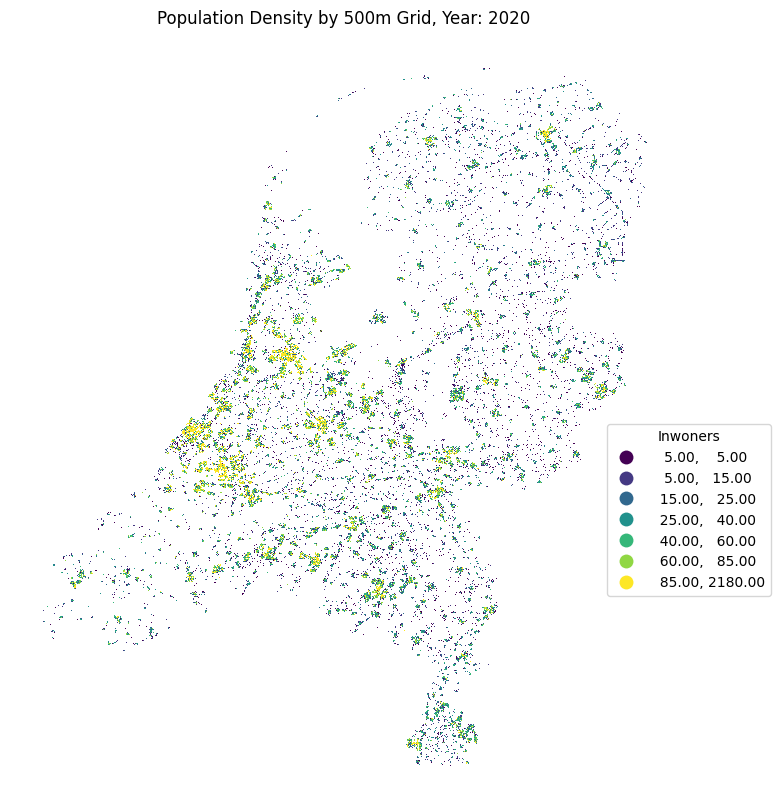

In [38]:
year = 2020
resolution = 100
column_to_display = "aantal_inwoners"

layer_viewer(year, resolution)

### Map 500 x 500, year 2015

Layers:
vierkant_500m_2015


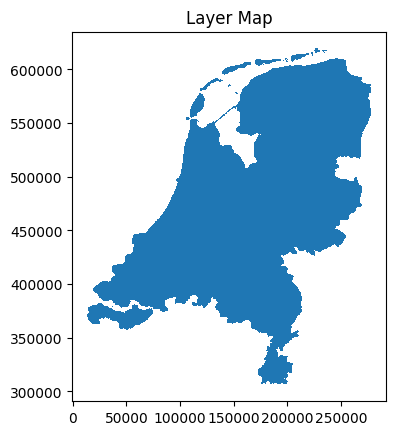

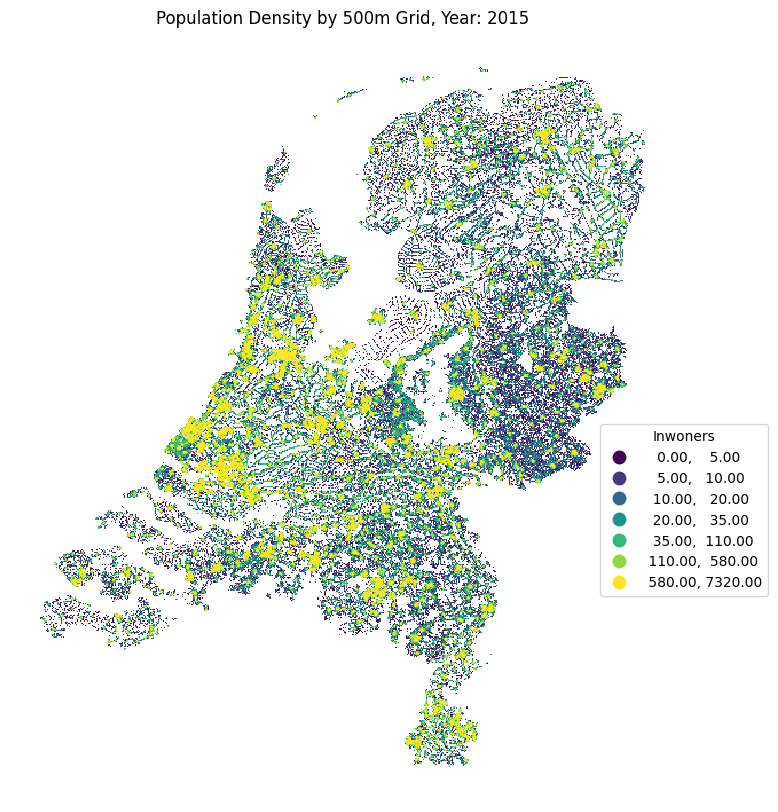

In [35]:
year = 2015
resolution = 500
column_to_display = "aantal_inwoners"

layer_viewer(year, resolution)

### Map 500 x 500, year 2020

Layers:
vierkant_500m_2020


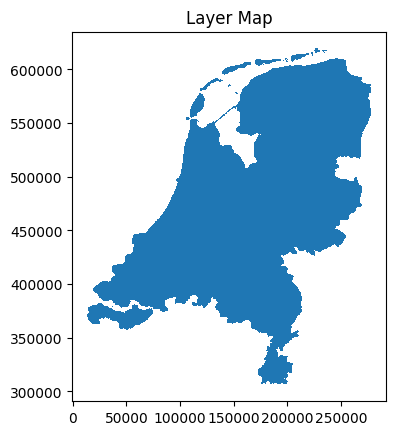

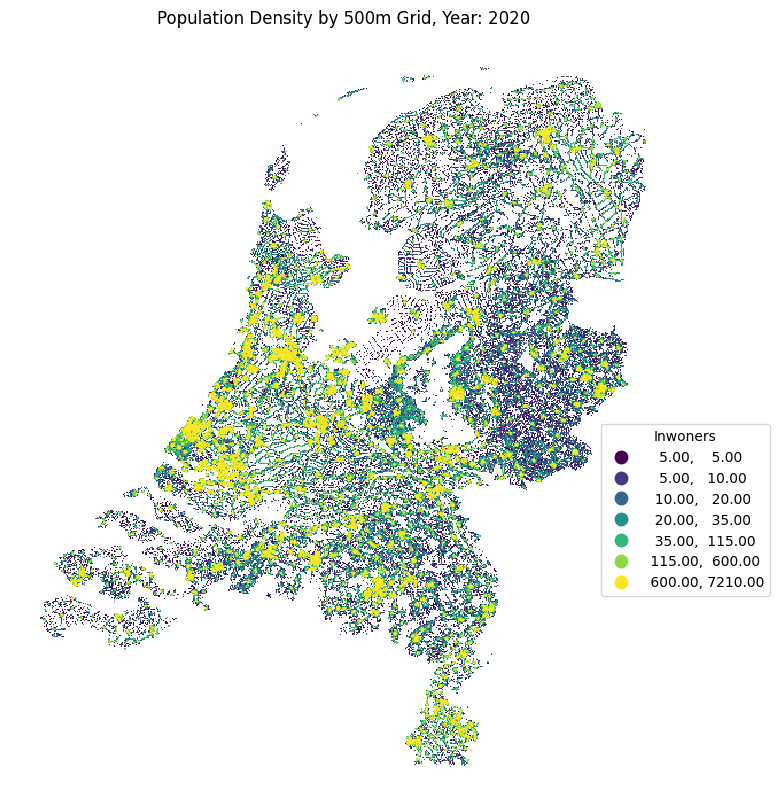

In [36]:
year = 2020
resolution = 500
column_to_display = "aantal_inwoners"

layer_viewer(year, resolution)

### Map 1000 x 1000, year 2012

Layers:
pd_nl_grid_2012
layer_styles


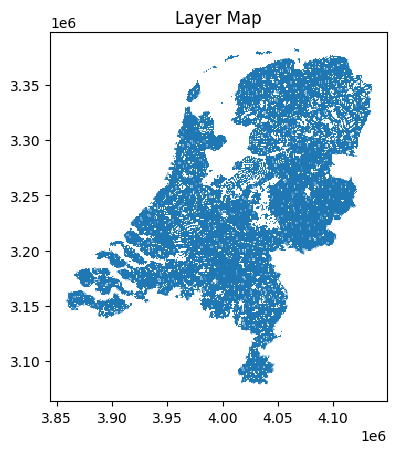

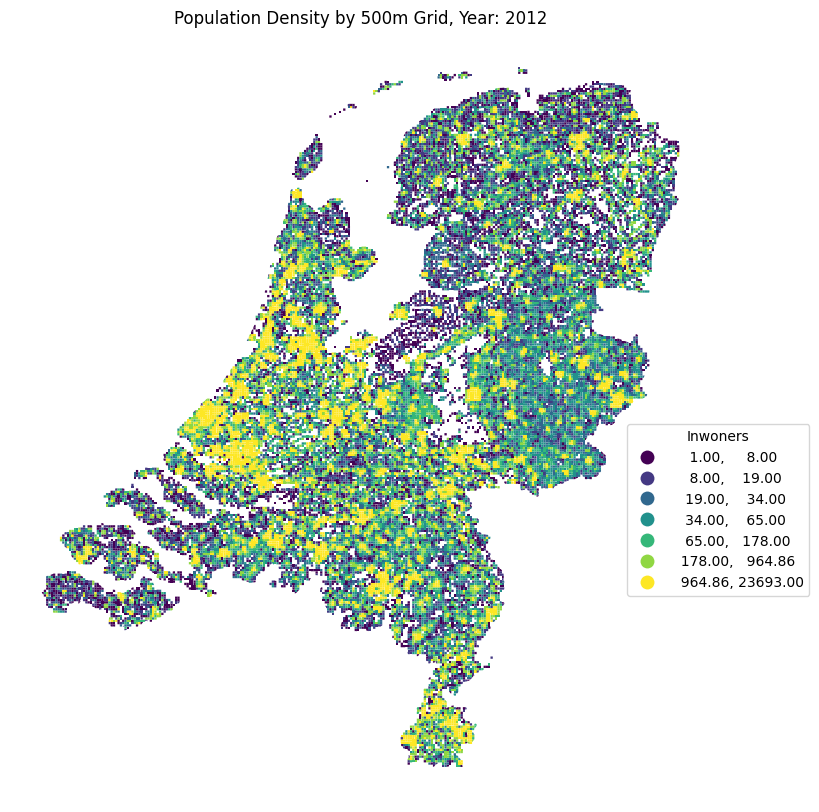

In [44]:
year = 2012
resolution = 1000
column_to_display = "obsvalue"

layer_viewer(year, resolution, column_to_display)